In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.datasets import mnist
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf
tf.python.control_flow_ops = tf
import pydot
from keras.utils.visualize_util import plot
from IPython.display import Image

Using TensorFlow backend.


# Model 0

In [4]:
batch_size = 128
nb_classes = 19
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)

if K.image_dim_ordering() == 'th':
    #X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    #X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# CNN
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
# dense layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
plot(model, to_file='./model_0.png',show_shapes=True)

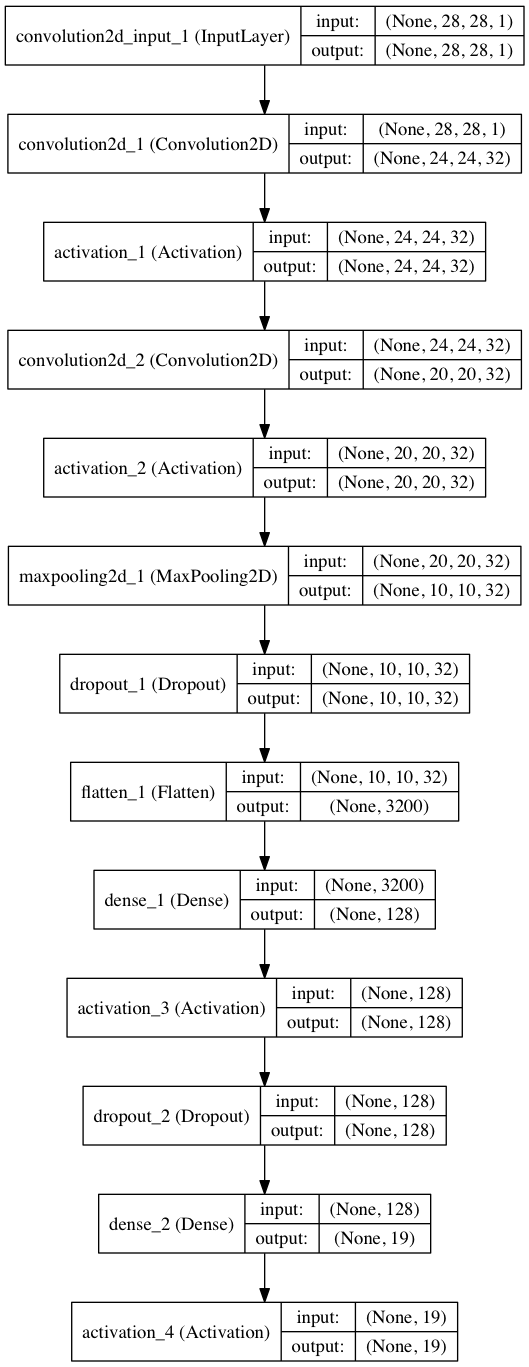

In [5]:
Image('./model_0.png')

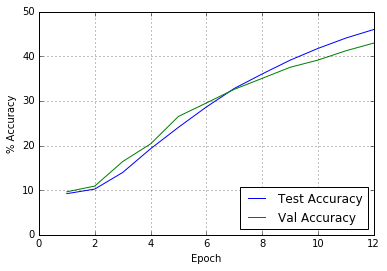

In [6]:
df0 = pd.read_csv('./model0_60-60.log')# plt val accuracy and test accuracy vs epoch
plt.figure()
plt.plot(np.array(df0['epoch']),np.array(df0['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df0['epoch']),np.array(df0['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,60,10))
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Model 1

In [7]:
del model

In [8]:
batch_size = 128
nb_classes = 19
nb_epoch = 20

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)

if K.image_dim_ordering() == 'th':
    #X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    #X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# CNN
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
# dense layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
plot(model, to_file='./model_1.png',show_shapes=True)

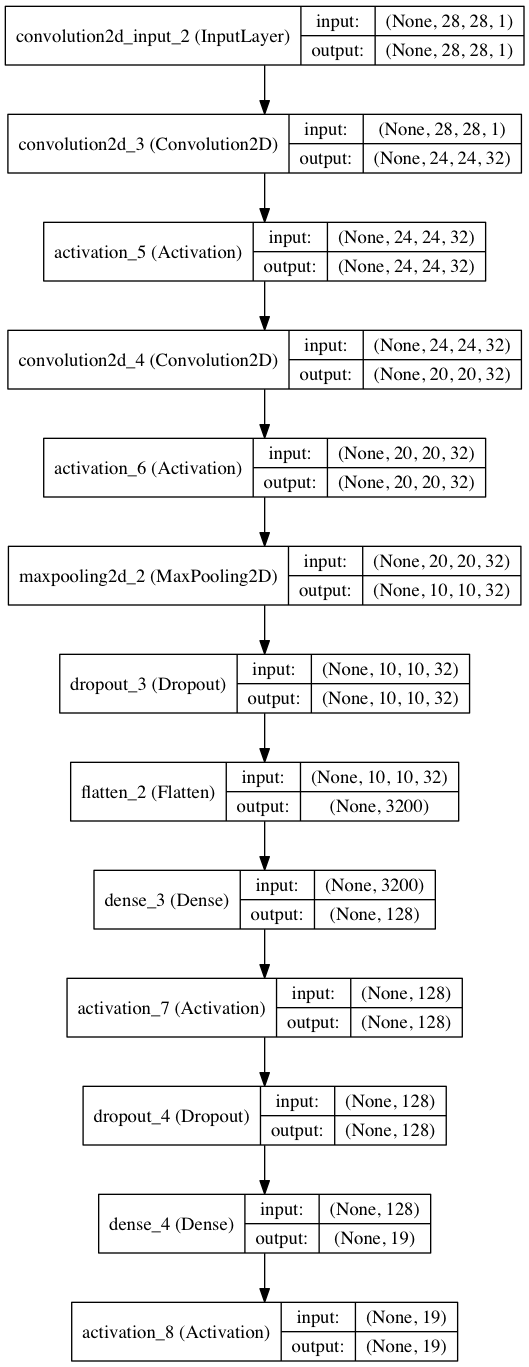

In [9]:
Image('./model_1.png')

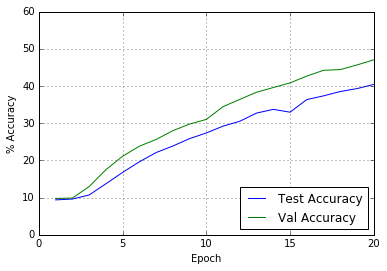

In [10]:
df1 = pd.read_csv('./model1_28-28.log')# plt val accuracy and test accuracy vs epoch
plt.figure()
plt.plot(np.array(df1['epoch']),np.array(df1['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df1['epoch']),np.array(df1['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,70,10))
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Model 2

In [11]:
del model

In [12]:
model = Sequential()

img_rows, img_cols = 28,28
if K.image_dim_ordering() == 'th':
    #X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    #X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


# first layer
model.add(Convolution2D(64, 5, 5, border_mode='valid',input_shape=input_shape))
model.add(Activation('relu'))

# second layer
model.add(Convolution2D(64, 5, 5))
model.add(Activation('relu'))

# maxpooling with dropout rate 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten
model.add(Flatten())

# dense layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(19))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

plot(model, to_file='./model_2.png',show_shapes=True)

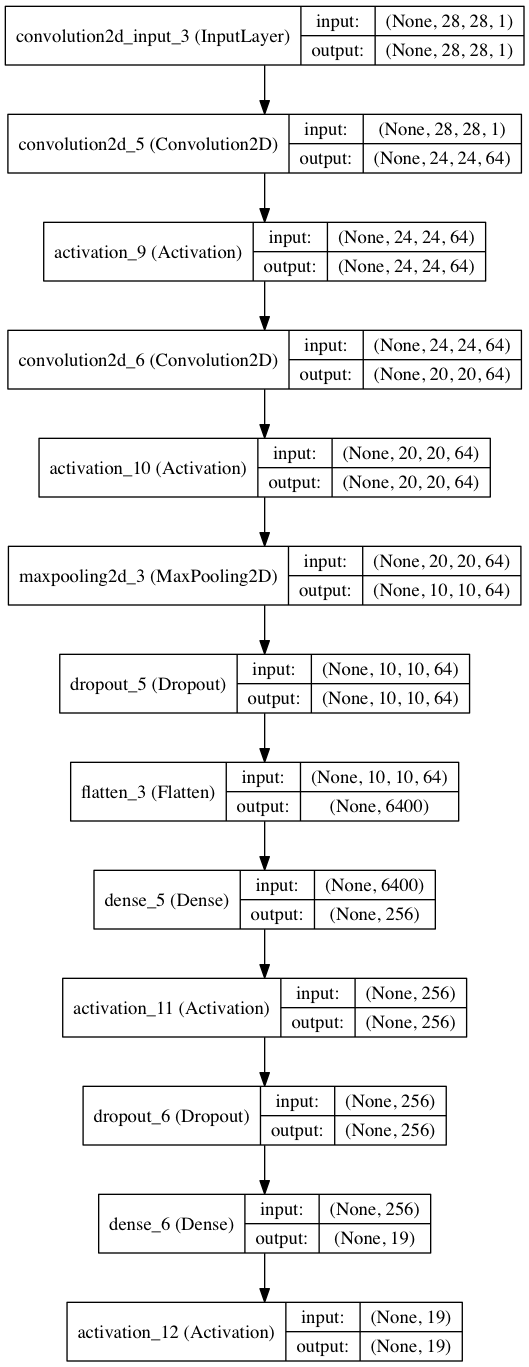

In [13]:
Image("./model_2.png")

In [14]:
df2 = pd.read_csv('./model_2.log')

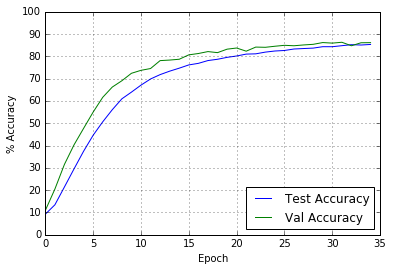

In [15]:
# plt val accuracy and test accuracy vs epoch
plt.figure(1)
plt.plot(np.array(df2['epoch']),np.array(df2['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df2['epoch']),np.array(df2['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,10))
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Going Deeper to 3 Layers

# Model 3

In [16]:
del model

In [17]:
batch_size = 128
nb_classes = 19
nb_epoch = 40

#input image dimensions
img_rows, img_cols = 28,28
# number of convolutional filters to use
nb_filters = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)

if K.image_dim_ordering() == 'th':
    #X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    #X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# CNN Model
model = Sequential()

# layer 1
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))

# layer 2
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# layer 3
model.add(Convolution2D(32, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# max pool
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))


model.add(Flatten())
# dense layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

plot(model, to_file='./model_3.png',show_shapes=True)

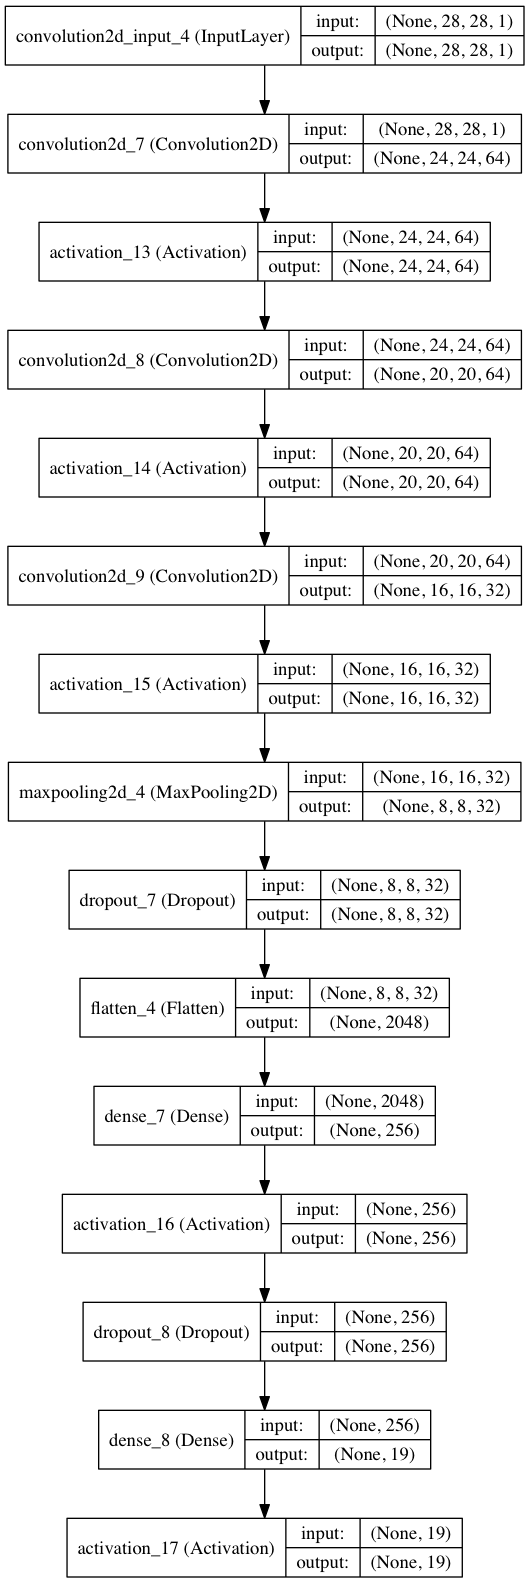

In [18]:
Image("./model_3.png")

In [19]:
df3 = pd.read_csv('./model_3.log')
df3.tail()

,epoch,acc,loss,val_acc,val_loss
31,31,0.948443,0.178241,0.946800,0.205544
32,32,0.949800,0.173031,0.951400,0.186979
33,33,0.951000,0.168430,0.947100,0.209099
34,34,0.952286,0.166672,0.944833,0.211525
35,35,0.954400,0.157884,0.948800,0.207192


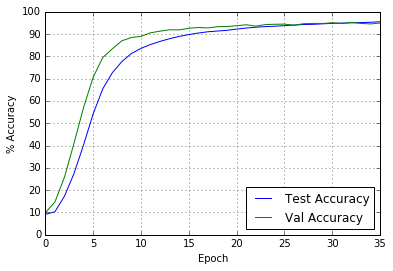

In [20]:
# plt val accuracy and test accuracy vs epoch
plt.figure(2)
plt.plot(np.array(df3['epoch']),np.array(df3['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df3['epoch']),np.array(df3['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,10))
plt.legend(loc='lower right')
plt.grid()
plt.show()

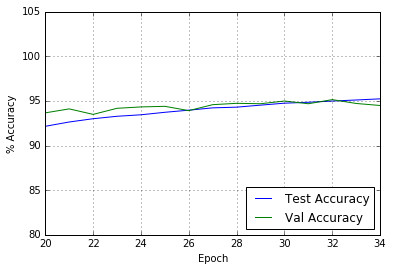

In [21]:
plt.figure(3)
plt.plot(np.array(df3['epoch'][20:35]),np.array(df3['acc'][20:35])*100.,label='Test Accuracy')
plt.plot(np.array(df3['epoch'][20:35]),np.array(df3['val_acc'][20:35])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(80,110,5))
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Model 4
### From model 3 lets go wide again this time we go: 128 filters -> 64 filters -> 32 filters with a final dense layer of 512 
####  Currently Testing should be done by tomorrow

In [22]:
del model

In [23]:
batch_size = 200
nb_classes = 19
nb_epoch = 50

#input image dimensions
img_rows, img_cols = 28,28

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)

if K.image_dim_ordering() == 'th':
    #X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    #X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# CNN
model = Sequential()

# layer 1
model.add(Convolution2D(128, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))

model.add(Activation('relu'))

# layer 2
model.add(Convolution2D(64, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# layer 3 we down size
model.add(Convolution2D(32, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# max pooling
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# flatten pooling
model.add(Flatten())

# 1st dense layer
model.add(Dense(512))
model.add(Activation('relu'))

# class dense layer
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
plot(model, to_file='./model_4.png',show_shapes=True)

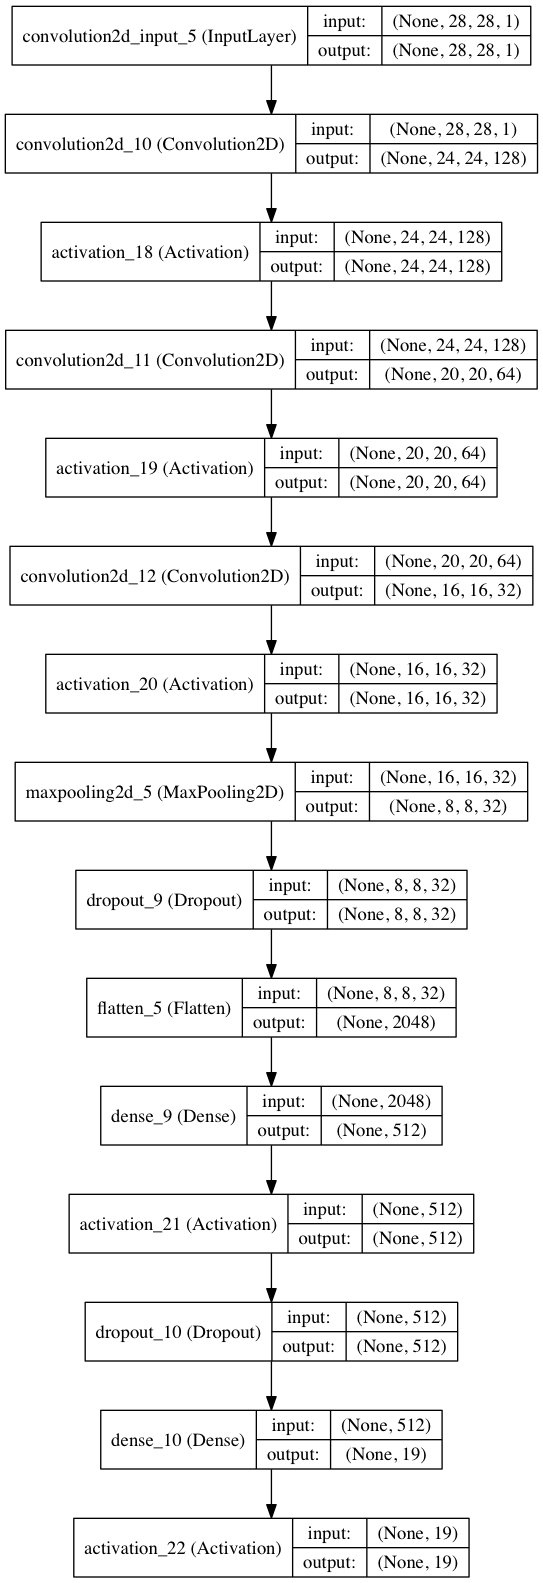

In [24]:
Image('./model_4.png')

# Results of Model 4

In [25]:
df4 = pd.read_csv('./test4.log')
df4

,epoch,acc,loss,val_acc,val_loss
0,0,0.092086,2.815969,0.098400,2.779017
1,1,0.097029,2.758822,0.115333,2.628303
2,2,0.138057,2.529996,0.200433,2.297257
3,3,0.211371,2.215288,0.318367,1.932434
4,4,0.318571,1.883569,0.473000,1.566110
5,5,0.481543,1.480902,0.642133,1.119530
6,6,0.637429,1.102697,0.716167,0.890177
7,7,0.741914,0.830438,0.836500,0.581281
8,8,0.802886,0.659300,0.861367,0.480827
9,9,0.837243,0.551882,0.883367,0.411318


In [26]:
df4_gpu = pd.read_csv('./test4_gpu.log')
df4_gpu

,epoch,acc,loss,val_acc,val_loss
0,0,0.094229,2.815654,0.098500,2.781285
1,1,0.095929,2.765724,0.105033,2.718673
2,2,0.138500,2.550543,0.200600,2.299839
3,3,0.252243,2.109297,0.378700,1.783734
4,4,0.405971,1.685500,0.597633,1.271653
5,5,0.579771,1.254004,0.738267,0.896239
6,6,0.714457,0.915183,0.820400,0.632673
7,7,0.790471,0.699727,0.847967,0.523384
8,8,0.831343,0.573490,0.886333,0.399668
9,9,0.859886,0.481756,0.902600,0.352945


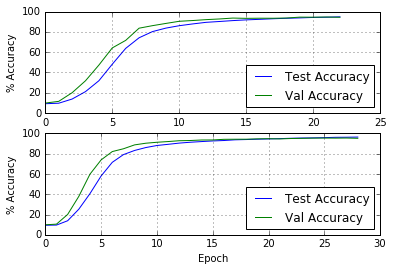

In [27]:
plt.figure(3)
plt.subplot(211)
plt.plot(np.array(df4['epoch']),np.array(df4['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df4['epoch']),np.array(df4['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,20))
plt.legend(loc='lower right')
plt.grid()

plt.subplot(212)
plt.plot(np.array(df4_gpu['epoch']),np.array(df4_gpu['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df4_gpu['epoch']),np.array(df4_gpu['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,20))
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [28]:
df3['val_acc'][35]*100

94.879999996821084

In [29]:
df4_gpu['val_acc'][28]*100

95.106666247049958

# Differences between Model 3 and 4
We managed to achieve the same accuracy, but in fewer epochs. We notice that they have the same validation accuracy and we only have a 0.236% improvement from model 3 to model 4. We are looking for an increase on the order of a few percent. Scott's method currently, has 99.710 % We are gonna go deeper. Let's look at what some of the fine folk of the ML community have made with CNNs.
<p>
From this blog: https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721#.4ncb34w2a , we observe this cnn model:
</p>

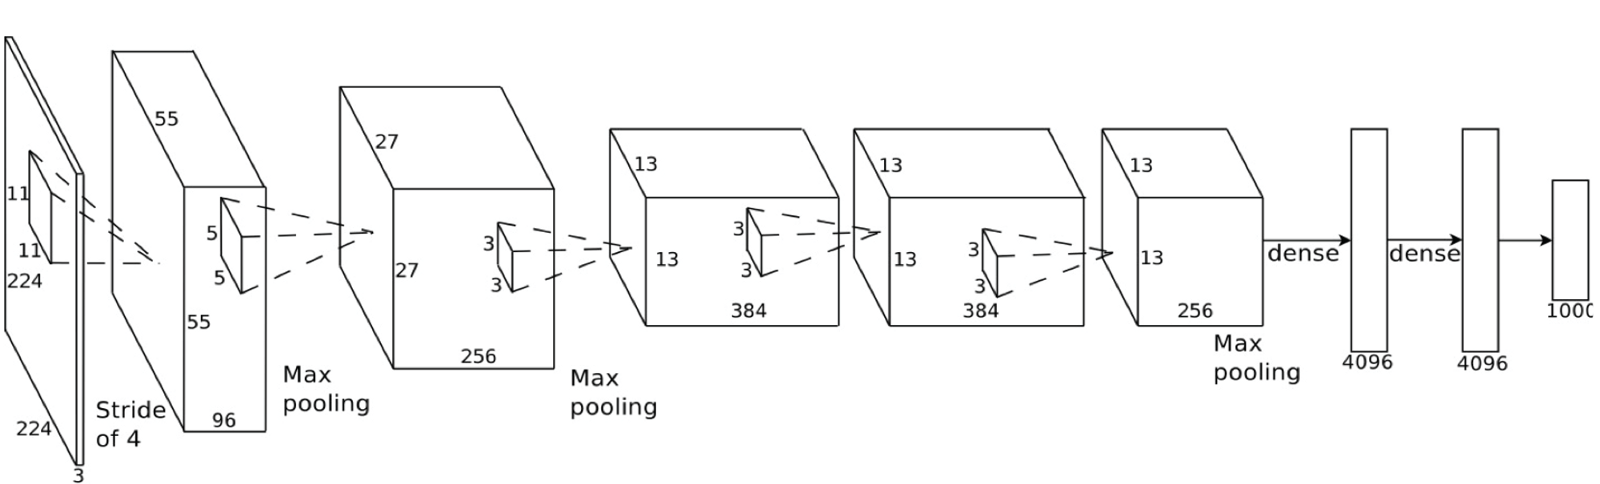

In [30]:
Image('./example_cnn.png')

Lets build and try this out!!

In [31]:
del model

In [32]:
batch_size = 200
nb_classes = 19
nb_epoch = 50

#input image dimensions
img_rows, img_cols = 28,28

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size regular
kernel_size = (5, 5)
# convolution kernel size small
kernel_size_small = (3, 3)

if K.image_dim_ordering() == 'th':
    #X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    #X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    #X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    #X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# CNN
model = Sequential()

# layer 1
model.add(Convolution2D(128, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))

model.add(Activation('relu'))

# layer 2
model.add(Convolution2D(64, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# layer 3 we down size
model.add(Convolution2D(32, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# max pooling 1
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# layer 4
model.add(Convolution2D(64, kernel_size_small[0], kernel_size_small[1]))
model.add(Activation('relu'))


# max pooling 2
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# flatten pooling
model.add(Flatten())

# 1st dense layer
model.add(Dense(512))
model.add(Activation('relu'))

# class dense layer
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
plot(model, to_file='./model_5.png',show_shapes=True)

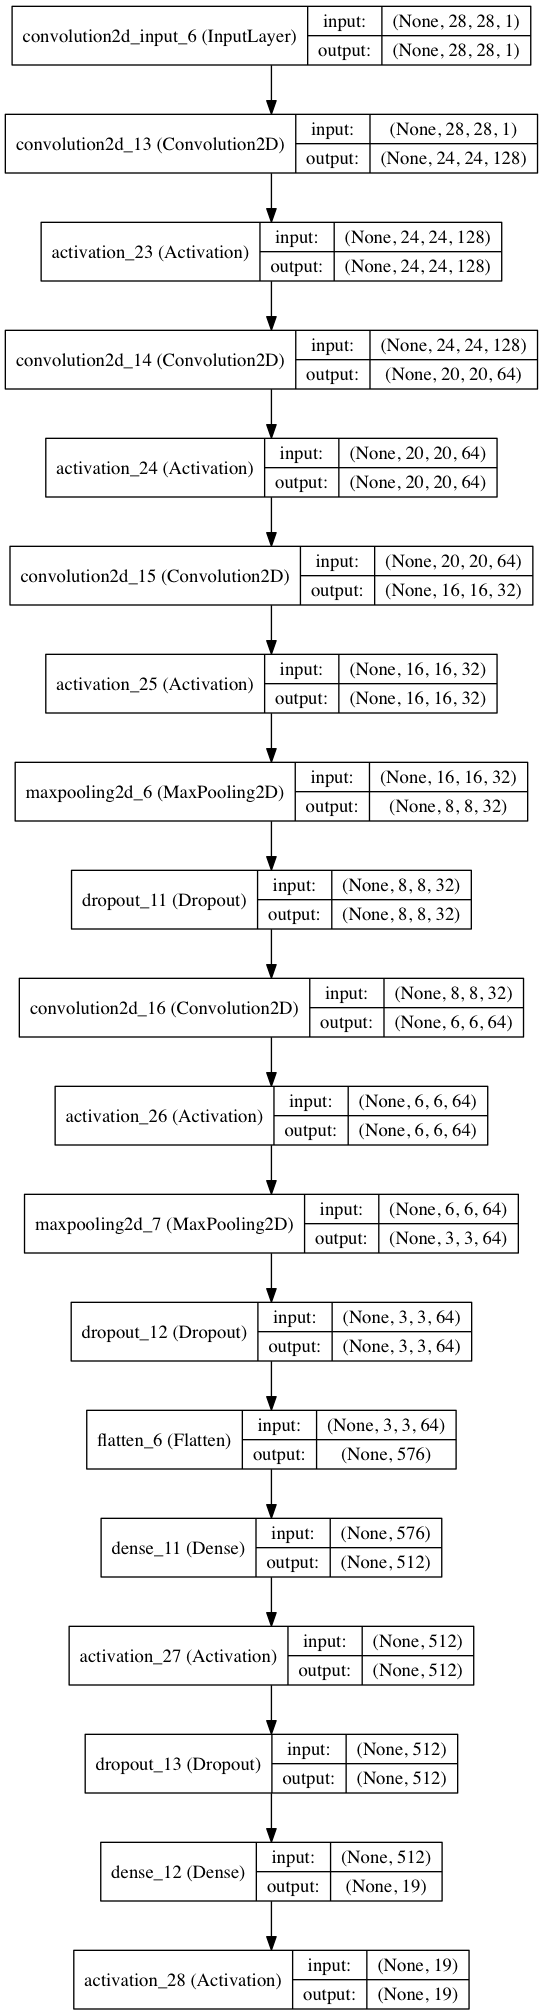

In [33]:
Image('./model_5.png')

In [34]:
df5 = pd.read_csv('./test5.log')

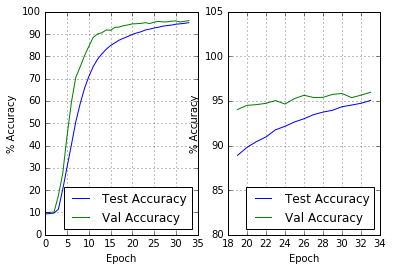

In [35]:
plt.figure(5)
plt.subplot(121)
plt.plot(np.array(df5['epoch']),np.array(df5['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df5['epoch']),np.array(df5['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,10))
plt.legend(loc='lower right')
plt.grid()
plt.subplot(122)
plt.plot(np.array(df5['epoch'][19:35]),np.array(df5['acc'][19:35])*100.,label='Test Accuracy')
plt.plot(np.array(df5['epoch'][19:35]),np.array(df5['val_acc'][19:35])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(80,110,5))
plt.legend(loc='lower right')
plt.grid()

# Model 5.1 and 5.2

In [47]:
del model

In [48]:
batch_size = 200
nb_classes = 19
nb_epoch = 100

#input image dimensions
img_rows, img_cols = 28,28

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size regular
kernel_size = (5, 5)
# convolution kernel size small
kernel_size_small = (3, 3)

if K.image_dim_ordering() == 'th':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)
    
# CNN
model = Sequential()

# layer 1
model.add(Convolution2D(256, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))

model.add(Activation('relu'))

# layer 2
model.add(Convolution2D(128, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# layer 3 we down size
model.add(Convolution2D(128, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# max pooling 1
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# layer 4
model.add(Convolution2D(64, kernel_size_small[0], kernel_size_small[1]))
model.add(Activation('relu'))


# max pooling 2
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# flatten pooling
model.add(Flatten())

# 1st dense layer
model.add(Dense(1024))
model.add(Activation('relu'))

# 2nd dense layer
model.add(Dense(1024))
model.add(Activation('relu'))

# class dense layer
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

plot(model, to_file='./model5_1.png',show_shapes=True)

In [36]:
del model

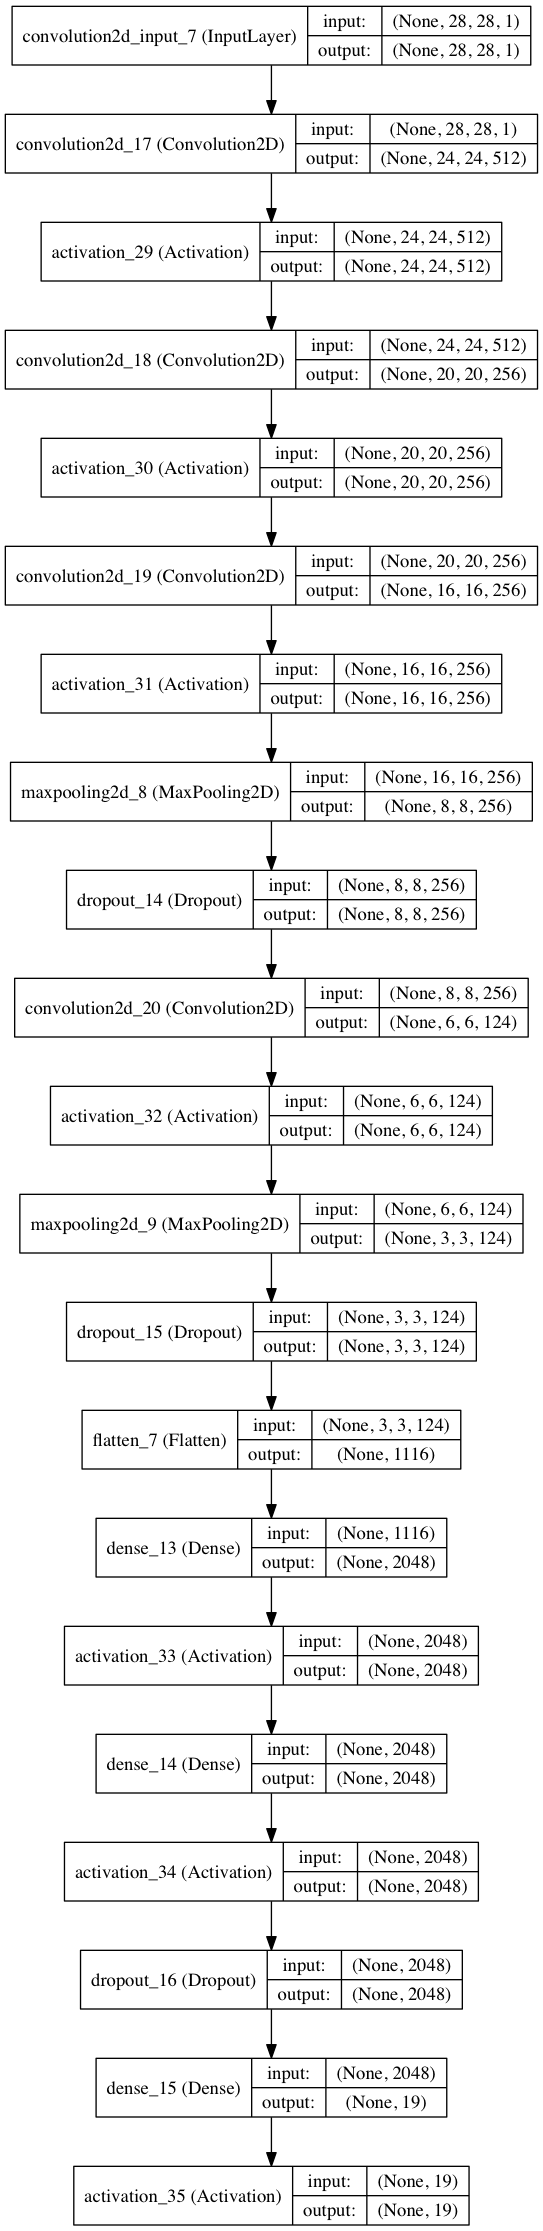

In [37]:
batch_size = 200
nb_classes = 19
nb_epoch = 100

#input image dimensions
img_rows, img_cols = 28,28

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size regular
kernel_size = (5, 5)
# convolution kernel size small
kernel_size_small = (3, 3)

if K.image_dim_ordering() == 'th':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

# CNN
model = Sequential()

# layer 1
model.add(Convolution2D(512, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))

model.add(Activation('relu'))

# layer 2
model.add(Convolution2D(256, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# layer 3 we down size
model.add(Convolution2D(256, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))

# max pooling 1
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# layer 4
model.add(Convolution2D(124, kernel_size_small[0], kernel_size_small[1]))
model.add(Activation('relu'))


# max pooling 2
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# flatten pooling
model.add(Flatten())

# 1st dense layer
model.add(Dense(2048))
model.add(Activation('relu'))

# 2nd dense layer
model.add(Dense(2048))
model.add(Activation('relu'))

# class dense layer
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
plot(model, to_file='./model5_2.png',show_shapes=True)
Image('./model5_2.png')

In [38]:
df5_1 = pd.read_csv('./test5_1.log')
df5_2 = pd.read_csv('./test5_2.log')

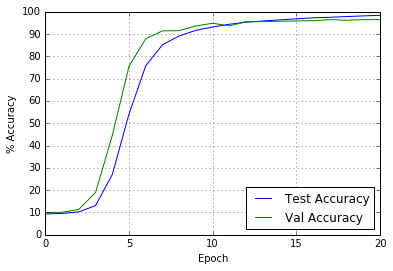

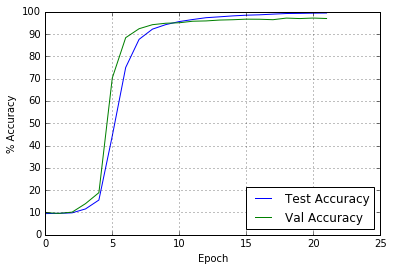

In [39]:
plt.figure(5)
plt.plot(np.array(df5_1['epoch']),np.array(df5_1['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df5_1['epoch']),np.array(df5_1['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,10))
plt.legend(loc='lower right')
plt.grid()
plt.show()
plt.figure(6)
plt.plot(np.array(df5_2['epoch']),np.array(df5_2['acc'])*100.,label='Test Accuracy')
plt.plot(np.array(df5_2['epoch']),np.array(df5_2['val_acc'])*100.,label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.yticks(np.arange(0,110,10))
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [46]:
print df5_1.tail()
print df5_2.tail()

    epoch       acc      loss   val_acc  val_loss
16     16  0.972286  0.105174  0.959533  0.195753
17     17  0.974529  0.095971  0.963800  0.178575
18     18  0.977786  0.081336  0.961267  0.183814
19     19  0.980686  0.071837  0.963900  0.186866
20     20  0.983300  0.061919  0.963900  0.190873
    epoch       acc      loss   val_acc  val_loss
17     17  0.988671  0.042835  0.963733  0.179646
18     18  0.991400  0.032723  0.970933  0.150150
19     19  0.992043  0.030409  0.968800  0.169580
20     20  0.993043  0.027080  0.971100  0.153971
21     21  0.993657  0.023030  0.969000  0.177474


In [41]:
df5_3 = pd.read_csv('/Users/RyanSampana/Desktop/scratch/test5_3.log')

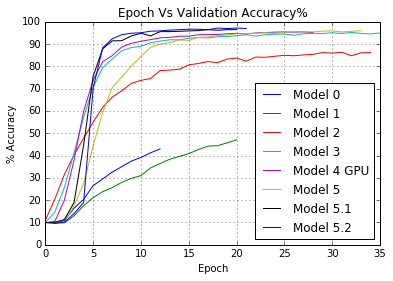

In [42]:
# we create a figure with all the models.
plt.figure(10)

plt.plot(np.array(df0['epoch']),np.array(df0['val_acc'])*100.,label='Model 0')
plt.plot(np.array(df1['epoch']),np.array(df1['val_acc'])*100.,label='Model 1')
plt.plot(np.array(df2['epoch']),np.array(df2['val_acc'])*100.,label='Model 2')
plt.plot(np.array(df3['epoch']),np.array(df3['val_acc'])*100.,label='Model 3')
#plt.plot(np.array(df4['epoch']),np.array(df4['val_acc'])*100.,label='Model 4')
plt.plot(np.array(df4_gpu['epoch']),np.array(df4_gpu['val_acc'])*100.,label='Model 4 GPU')
plt.plot(np.array(df5['epoch']),np.array(df5['val_acc'])*100.,label='Model 5')
plt.plot(np.array(df5_1['epoch']),np.array(df5_1['val_acc'])*100.,label='Model 5.1')
plt.plot(np.array(df5_2['epoch']),np.array(df5_2['val_acc'])*100.,label='Model 5.2')


plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.title('Epoch Vs Validation Accuracy%')
plt.yticks(np.arange(0,110,10))
plt.legend(loc='lower right')
plt.grid()
plt.savefig('./cnn_results_1.png')
plt.show()

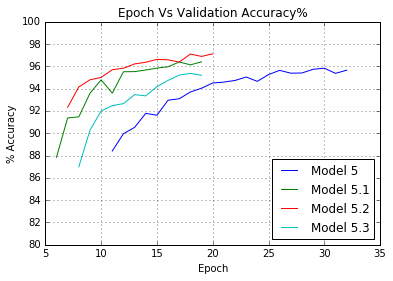

In [43]:
# we create a figure with all the models.
plt.figure(10)

#plt.plot(np.array(df0['epoch']),np.array(df0['val_acc'])*100.,label='Model 0')
#plt.plot(np.array(df1['epoch']),np.array(df1['val_acc'])*100.,label='Model 1')
#plt.plot(np.array(df2['epoch']),np.array(df2['val_acc'])*100.,label='Model 2')
#plt.plot(np.array(df3['epoch']),np.array(df3['val_acc'])*100.,label='Model 3')
#plt.plot(np.array(df4['epoch']),np.array(df4['val_acc'])*100.,label='Model 4')
#plt.plot(np.array(df4_gpu['epoch']),np.array(df4_gpu['val_acc'])*100.,label='Model 4 GPU')
plt.plot(np.array(df5['epoch'][-23:-1]),np.array(df5['val_acc'][-23:-1])*100.,label='Model 5')
plt.plot(np.array(df5_1['epoch'][-15:-1]),np.array(df5_1['val_acc'][-15:-1])*100.,label='Model 5.1')
plt.plot(np.array(df5_2['epoch'][-15:-1]),np.array(df5_2['val_acc'][-15:-1])*100.,label='Model 5.2')
plt.plot(np.array(df5_3['epoch'][-13:-1]),np.array(df5_3['val_acc'][-13:-1])*100.,label='Model 5.3')


plt.xlabel('Epoch')
plt.ylabel(r'% Accuracy')
plt.title('Epoch Vs Validation Accuracy%')
plt.yticks(np.arange(80,102,2))
plt.legend(loc='lower right')
plt.grid()
plt.savefig('./cnn_results_2.png')
plt.show()

In [45]:
df5_3.tail()

,epoch,acc,loss,val_acc,val_loss
16,16,0.934229,0.229722,0.947300,0.199769
17,17,0.939500,0.215370,0.952100,0.184749
18,18,0.946343,0.194430,0.953600,0.184946
19,19,0.949357,0.178738,0.951900,0.191296
20,20,0.952357,0.168065,0.950667,0.196323


In [49]:
df5_2.tail()

,epoch,acc,loss,val_acc,val_loss
17,17,0.988671,0.042835,0.963733,0.179646
18,18,0.991400,0.032723,0.970933,0.150150
19,19,0.992043,0.030409,0.968800,0.169580
20,20,0.993043,0.027080,0.971100,0.153971
21,21,0.993657,0.023030,0.969000,0.177474
